In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 10
n_files = 10
base_dir = "toy_stage2_full_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    #if f_dir in ["toy_stage2_full_350_400.pkl", "toy_stage2_full_200_250.pkl"]:
    #    continue
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])
    print(pd.DataFrame(coverage_i).shape)
    print(f_dir)
    print(pd.DataFrame(coverage_i).mean())

(10, 9)
toy_stage2_full_0_10.pkl
1.0         0.849048
2.5         0.871429
Tree val    0.888095
Naive       0.768095
UV_0.1      0.912381
UV_0.2      0.950000
UV_0.3      0.902381
UV_0.4      0.870476
UV_0.5      0.916667
dtype: float64
(10, 9)
toy_stage2_full_10_20.pkl
1.0         0.769048
2.5         0.873810
Tree val    0.876667
Naive       0.580476
UV_0.1      0.862381
UV_0.2      0.884762
UV_0.3      0.900476
UV_0.4      0.906667
UV_0.5      0.904762
dtype: float64
(10, 9)
toy_stage2_full_20_30.pkl
1.0         0.813333
2.5         0.902381
Tree val    0.933333
Naive       0.656667
UV_0.1      0.869048
UV_0.2      0.885714
UV_0.3      0.916667
UV_0.4      0.930000
UV_0.5      0.966667
dtype: float64
(10, 9)
toy_stage2_full_30_40.pkl
1.0         0.805714
2.5         0.903810
Tree val    0.966667
Naive       0.636190
UV_0.1      0.918095
UV_0.2      0.883333
UV_0.3      0.857143
UV_0.4      0.933333
UV_0.5      0.900000
dtype: float64
(10, 9)
toy_stage2_full_40_50.pkl
1.0         0.7

In [4]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,2.5,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,0.857143,1.000000,1.000000,0.833333,1.000000,0.857143,1.000000
1,0.833333,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000
2,0.833333,0.833333,1.000000,1.000000,0.833333,1.000000,0.833333
3,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.666667
4,0.800000,1.000000,0.600000,1.000000,1.000000,0.800000,1.000000
...,...,...,...,...,...,...,...
5,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.666667
6,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,1.000000
7,1.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.666667,0.666667,0.833333,1.000000,0.833333,1.000000,1.000000


In [5]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,2.5,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.295099,1.175619,3.890800,2.860750,2.452458,2.344923,2.146612
1,1.208172,1.175144,3.905280,2.862596,2.463473,2.221746,2.037130
2,1.196622,1.168834,3.874596,2.861579,2.440683,2.185567,2.023442
3,1.136828,1.154563,3.835782,2.873993,2.457208,2.152446,2.076211
4,1.071999,1.082467,3.621294,2.642195,2.218952,2.015612,1.839041
...,...,...,...,...,...,...,...
5,1.169606,1.151599,3.813432,2.816984,2.470824,2.153696,2.000631
6,1.207746,1.192912,3.900577,2.847797,2.208410,2.075851,1.830554
7,1.137040,1.056254,3.868170,2.835517,2.232621,2.221501,2.023277
8,1.255030,1.175815,3.913452,2.888513,2.433492,2.197654,2.055430


In [6]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)

In [7]:
MSE_df.mean()

1.0       4.719022
2.5       4.962280
UV_0.1    4.675064
UV_0.2    4.771468
UV_0.3    4.784672
UV_0.4    4.857674
UV_0.5    4.941331
dtype: float64

In [8]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,6.5)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96041/1924133983.py:13: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96041/1924133983.py:13: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_96041/1924133983.py:13: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)


Coverage :
 RRT(1)      0.813571
RRT(2.5)    0.856762
UV(0.1)     0.882429
UV(0.2)     0.899429
UV(0.3)     0.897619
UV(0.4)     0.891571
UV(0.5)     0.912667
dtype: float64
Length :
 RRT(1)      1.184319
RRT(2.5)    1.169278
UV(0.1)     3.891522
UV(0.2)     2.866764
UV(0.3)     2.426631
UV(0.4)     2.178104
UV(0.5)     2.026736
dtype: float64
MSE :
 RRT(1)      4.719022
RRT(2.5)    4.962280
UV(0.1)     4.675064
UV(0.2)     4.771468
UV(0.3)     4.784672
UV(0.4)     4.857674
UV(0.5)     4.941331
dtype: float64


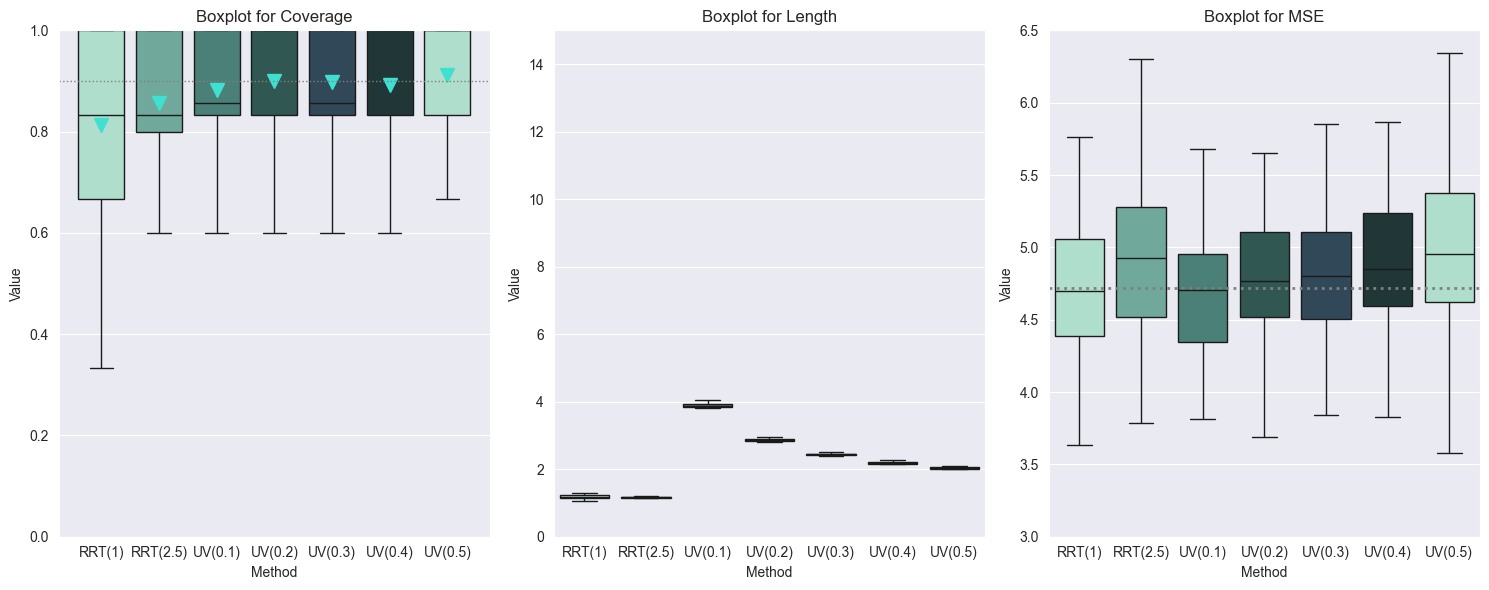

In [9]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "RRT(2.5)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])